In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [6]:
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")    # Opencv haarcascade -> Used to detect faces
path_train = "maskdata/maskdata/train/"            #Path to the train data directory
path_test = "maskdata/maskdata/test/"              #Path to the test data directory
x_train = []
y_train = []
x_test = []
y_test = []

def image_load(x_data,y_data,path):                              # Function to load the images and the labels
    mask_image_directories = os.listdir(path+"with_mask/")
    nomask_image_directories = os.listdir(path+"without_mask/")
    for m_image,nm_image in zip(mask_image_directories,nomask_image_directories):
        image = cv2.imread(path+"with_mask/"+m_image)
        image_gray =  cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        try:
            (x,y,w,h) = face_classifier.detectMultiScale(image_gray,1.3,5)[0]
            image_gray_crop = cv2.resize(image_gray[y:y+h,x:x+w],(100,100))
            image_gray_crop = image_gray_crop.reshape((100,100,1))
            x_data.append(image_gray_crop)
            y_data.append([1])
        except:
            pass

        image = cv2.imread(path+"without_mask/"+nm_image)
        image_gray =  cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        try:
            (x,y,w,h) = face_classifier.detectMultiScale(image_gray,1.3,5)[0]
            image_gray_crop = cv2.resize(image_gray[y:y+h,x:x+w],(100,100))
            image_gray_crop = image_gray_crop.reshape((100,100,1))
            x_data.append(image_gray_crop)
            y_data.append([0])
        except:
            pass
    return

image_load(x_train,y_train,path_train)    # Loading train data
image_load(x_test,y_test,path_test)       #Loading test data

In [10]:
model = tf.keras.models.Sequential([                                 #Model to determine wheather a person is wearing a mask or not
    tf.keras.layers.Conv2D(filters = 4,kernel_size = (3,3),input_shape = (100,100,1),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters = 8,kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters = 8,kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(2,activation = "softmax")
])

model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [11]:
model.fit(np.array(x_train),np.array(y_train),epochs = 3,batch_size = 1)   # Training the model

Epoch 1/3
339/339 [==============================] - 2s 5ms/step - loss: 1.5790 - accuracy: 0.7286
Epoch 2/3
339/339 [==============================] - 2s 5ms/step - loss: 0.2546 - accuracy: 0.9174
Epoch 3/3
339/339 [==============================] - 2s 5ms/step - loss: 0.1186 - accuracy: 0.9499


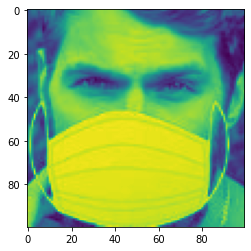

Mask


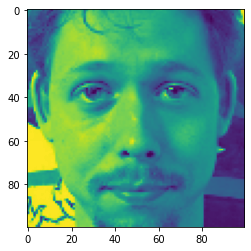

No_mask


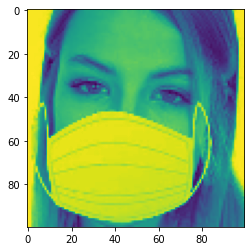

Mask


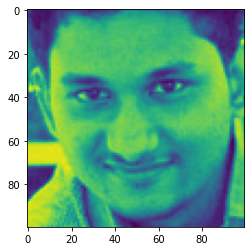

No_mask


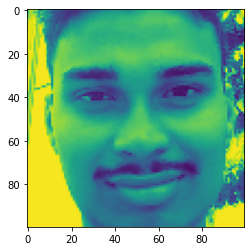

No_mask


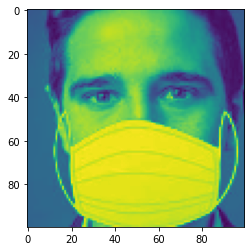

Mask


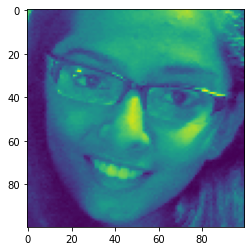

No_mask


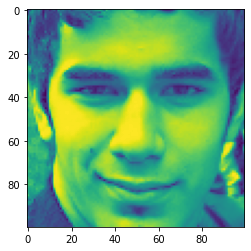

No_mask


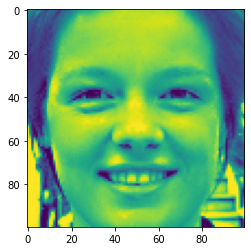

No_mask


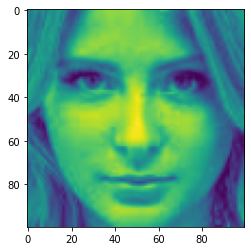

No_mask


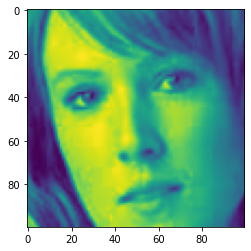

No_mask


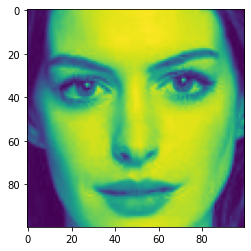

No_mask


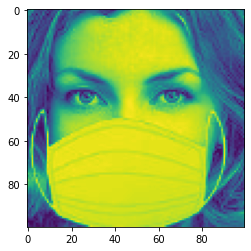

Mask


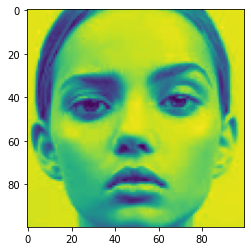

No_mask


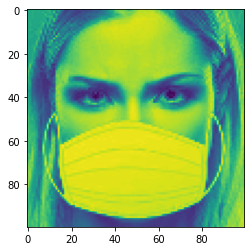

Mask


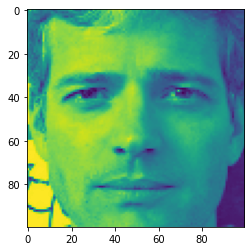

No_mask


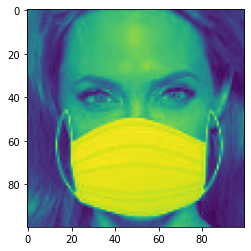

Mask


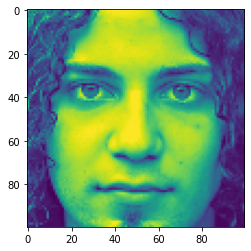

No_mask


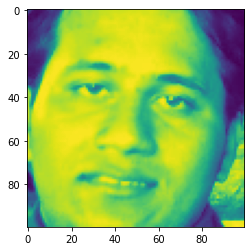

No_mask


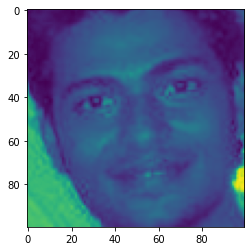

No_mask


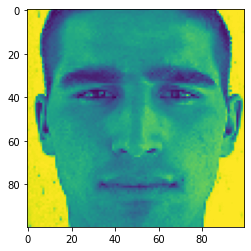

No_mask


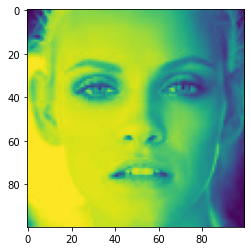

No_mask


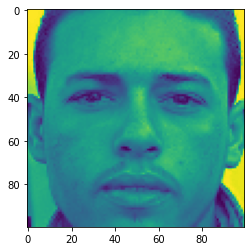

No_mask


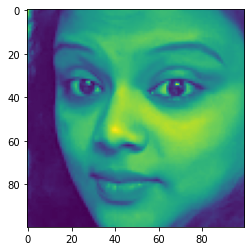

No_mask


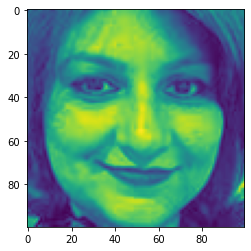

No_mask


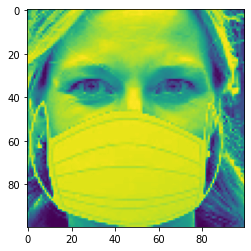

Mask


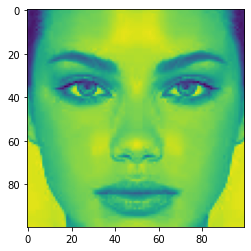

No_mask


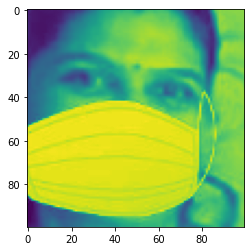

Mask


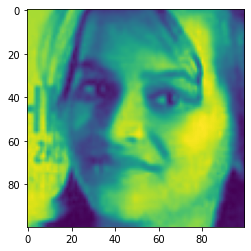

No_mask


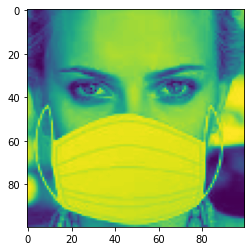

Mask


In [23]:
ind_to_value = {0:"No_mask",1:"Mask"}                    # Using the model to predict the test data
x_test = np.array(x_test)
y_test_predict = np.argmax(model.predict(x_test),axis = 1)
y_test_predict_value = [ind_to_value[_] for _ in y_test_predict]
for _ in range(30):
    plt.imshow(x_test[_].reshape((100,100)))
    plt.show()
    print(y_test_predict_value[_])